<a href="https://colab.research.google.com/github/sayed-kassem/NN_Torch/blob/MLP_iris/MLP_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
iris = load_iris()
print(iris['data'].shape)

(150, 4)


In [ ]:
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1./3, random_state=1)

In [ ]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()

In [ ]:
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)

In [ ]:
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [ ]:
class Model(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size,output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [ ]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 100
loss_hist = [0]*num_epochs
accuracy_hist = [0]* num_epochs

In [ ]:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred,y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

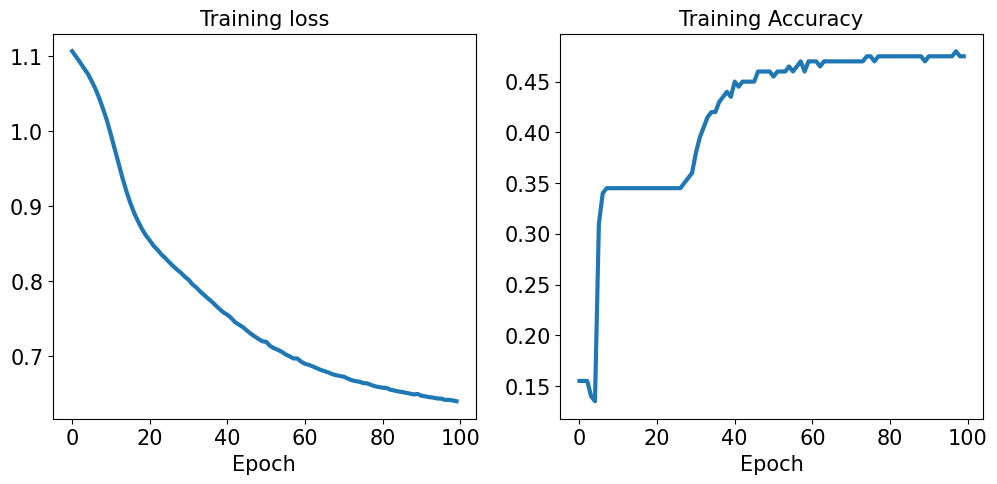

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_xlabel('Epoch', size=15)
ax.set_title("Training loss", size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw=3)
ax.set_xlabel("Epoch",size=15)
ax.set_title("Training Accuracy", size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

In [ ]:
X_test_norm = (X_test - np.mean(X_train))/np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test,dim=1)==y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [ ]:
path = 'iris_classifier.pt'
torch.save(model,path)

In [ ]:
model_new = torch.load(path)

In [ ]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [ ]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test,dim=1)==y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [ ]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [ ]:
mode_new = Model(input_size,hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>